<a href="https://colab.research.google.com/github/tg-bomze/collection-of-notebooks/blob/master/Text2PixelArt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><font color="black" size="+4">Text2PixelArt</font></b>

<b><font color="black" size="+2">Based on:</font></b>

**GitHub repository**: [CLIP](https://github.com/openai/CLIP), [ClipIt](https://github.com/dribnet/clipit)

Creator: **[dribnet](https://github.com/dribnet)**

Colab based on dribnet's [notebook](https://colab.research.google.com/github/dribnet/clipit/blob/master/demos/PixelDrawer.ipynb).

<b><font color="black" size="+2">Colab created by:</font></b>

GitHub: [@tg-bomze](https://github.com/tg-bomze),
Telegram: [@bomze](https://t.me/bomze),
Twitter: [@tg_bomze](https://twitter.com/tg_bomze).

---


```
(ENG) To get started, click on the button (where the red arrow indicates). After clicking, wait until the execution is complete.
```
```
(RUS) Чтобы начать, поочередно нажимайте на кнопки (куда указывают красные стрелки), дожидаясь завершения выполнения каждого блока.
```


In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Install all necessary libraries</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Установить все необходимые библиотеки</font></b>

#@markdown (Eng) Setup can take 3-7 minutes, but once it is complete it usually does not need to be repeated until you close the window.

#@markdown (Rus) Установка может занять 3-7 минут, но после завершения ее не нужно повторять, пока вы не закроете окно.

# https://stackoverflow.com/a/56727659/1010653

print('Wait a few minutes for all the required libraries to be installed.')

try: 
  !pip3 install googletrans==3.1.0a0
  from googletrans import Translator, constants
  from pprint import pprint
  translator = Translator()
except: pass

from IPython.display import clear_output

from IPython.utils import io
with io.capture_output() as captured:
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone https://github.com/dribnet/clipit
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..

import sys
sys.path.append("clipit")

result_msg = "setup complete"
import IPython
import os
print('\nDone!\n')
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

<b>(Eng) <font color="red" size="+1">Before executing the next block, select Runtime > Restart runtime ... from the top of the menu</font>

<b>(Rus) <font color="red" size="+1">Перед выполнением следующего блока выберите сверху в меню Среда выполнения > Перезагрузить среду выполнения</font>

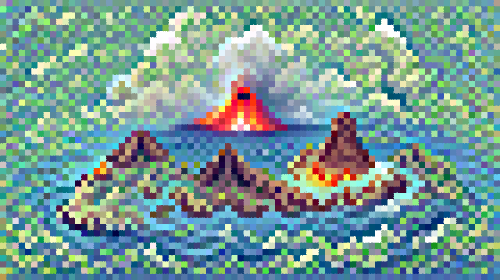

In [2]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Start Processing</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Начать обработку</font></b>


import sys
sys.path.append("clipit")

from IPython.display import clear_output
from googletrans import Translator, constants
from pprint import pprint
translator = Translator()

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")

use_pixeldraw = True #@param {type:"boolean"}

text = "\u0418\u0437\u0432\u0435\u0440\u0433\u0430\u044E\u0449\u0438\u0439\u0441\u044F \u0432\u0443\u043B\u043A\u0430\u043D \u043D\u0430 \u043E\u0441\u0442\u0440\u043E\u0432\u0435 \u043F\u043E\u0441\u0440\u0435\u0434\u0438 \u043E\u043A\u0435\u0430\u043D\u0430" #@param {type:"string"}
try:
  translation = translator.translate(text)
  new_text = translation.text
except: new_text = text
if use_pixeldraw: prompts = new_text + ' #pixelart'
else: prompts = new_text

iteration = 500 #@param {type:"integer"}
aspect = "widescreen" #@param ["widescreen", "square"]
scale = 2.5 #@param {type:"slider", min:1, max:8, step:0.25}
seed = 0 #@param {type:"integer"}
if seed == 0: seen = None
monochrom = False #@param {type:"boolean"}
#init_image = "/content/soon.jpg" #@param {type:"string"}

# Simple setup
import clipit
from pixeldrawer import PixelDrawer

# these are good settings for pixeldraw
clipit.reset_settings()
clipit.add_settings(prompts=prompts, aspect=aspect)
clipit.add_settings(quality="better", scale=scale)
clipit.add_settings(use_pixeldraw=use_pixeldraw)
clipit.add_settings(iterations=iteration)
clipit.add_settings(seed=seed)
clipit.add_settings(do_mono=monochrom)
#clipit.add_settings(init_image=init_image)
#clipit.add_settings(target_images='')
#clipit.add_settings(animation_dir='')
#clipit.add_settings(video=True)
#clipit.add_settings(save_every=50)

settings = clipit.apply_settings()
clipit.do_init(settings)
clear_output()
clipit.do_run(settings)

<b>(Eng) <font color="red" size="+1">If you get any errors while executing the block from above, click again on "Runtime > Restart Runtime" and run the block again</font>

<b>(Rus) <font color="red" size="+1">Если возникнут какие-либо ошибки, при выполнении блока сверху, нажмите еще раз на "Среда выполнения > Перезагрузить среду выполнения" и запустите блок заново</font>